# **1. Introduction**
### Title: Arizona vs. Maine Public School Funding Analysis

Objective:
Compare the funding systems of public schools in Arizona and Maine to evaluate which state offers better financial support for students. Metrics analyzed include:
- **Funding Gap** (difference between actual and required spending)
- **Poverty Rate** (percentage of students in poverty)
- **Outcome Gap** (difference in test scores relative to the national average)

Tools used:
Python (Pandas, Matplotlib, Seaborn) and statistical methods.

# **2. Data Overview**
### Title: Dataset Overview and Cleaning

Key Points:
- Dataset contains 3,911 records with 20 columns, including details on spending, poverty, enrollment, and funding disparities.
- Filled missing values in `Outcome_Gap` with the column mean.
- Renamed columns for clarity.
- Selected key columns: `State`, `Funding_Gap`, `Poverty_Rate`, etc.

Code:

In [1509]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1511]:
data = pd.read_csv('./maine_arizona_filtered.csv')

In [1513]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3911 entries, 0 to 3910
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        3911 non-null   int64  
 1   leaid       3911 non-null   int64  
 2   district    3911 non-null   object 
 3   state_name  3911 non-null   object 
 4   stabbr      3911 non-null   object 
 5   ppcstot     3911 non-null   float64
 6   predcost    3911 non-null   float64
 7   fundinggap  3911 non-null   float64
 8   outcomegap  2694 non-null   float64
 9   enroll      3911 non-null   int64  
 10  pov         3911 non-null   float64
 11  iep         3907 non-null   float64
 12  ell         3911 non-null   float64
 13  amind       3911 non-null   float64
 14  asian       3911 non-null   float64
 15  black       3911 non-null   float64
 16  hisp        3911 non-null   float64
 17  multi       3291 non-null   float64
 18  pac         3291 non-null   float64
 19  white       3911 non-null  

In [1515]:
# Select relevant variables
selected_columns = [
    'year', 'district', 'state_name', 'ppcstot', 'predcost', 
    'fundinggap', 'outcomegap', 'enroll', 'pov'
]
df = data[selected_columns].copy()

# Rename columns for clarity
df.rename(columns={
    'year': 'Year',
    'district': 'District',
    'state_name': 'State',
    'ppcstot': 'Actual_Spending',
    'predcost': 'Required_Spending',
    'fundinggap': 'Funding_Gap',
    'outcomegap': 'Outcome_Gap',
    'enroll': 'Enrollment',
    'pov': 'Poverty_Rate'
}, inplace=True)

In [1517]:
# Check for missing values
df.isnull().sum()

Year                    0
District                0
State                   0
Actual_Spending         0
Required_Spending       0
Funding_Gap             0
Outcome_Gap          1217
Enrollment              0
Poverty_Rate            0
dtype: int64

In [1519]:
# Fill missing values in Outcome_Gap with the mean for each state
df['Outcome_Gap'] = df.groupby('State')['Outcome_Gap'].transform(
    lambda x: x.fillna(x.mean())
)

# **3. Descriptive Statistics**
### Title: Summary of Funding and Poverty Metrics

Key Points:
- Summary statistics for `Funding_Gap` for both states.
- Highlighting the mean and distribution differences between Arizona and Maine.

Code:

In [1470]:
# Funding Gap Summary Statistics
AZ = df[df['State'] == 'Arizona']
ME = df[df['State'] == 'Maine']

print("Arizona Funding Gap Summary:")
print(AZ['Funding_Gap'].describe())
print()
print("Maine Funding Gap Summary:")
print(ME['Funding_Gap'].describe())

Arizona Funding Gap Summary:
count     2328.000000
mean     -4243.931701
std       5348.038593
min     -49389.000000
25%      -6511.750000
50%      -3203.000000
75%       -866.500000
max      11706.000000
Name: Funding_Gap, dtype: float64

Maine Funding Gap Summary:
count     1583.000000
mean      3582.365130
std       4343.980918
min     -12330.000000
25%        828.000000
50%       3817.000000
75%       6372.500000
max      18397.000000
Name: Funding_Gap, dtype: float64


**Observation:** The mean funding gap is approximately `-$4,244` for Arizona and `$3,582` for Maine, highlighting a significant disparity in how the two states fund their schools. Arizona faces substantial underfunding across its districts, while Maine demonstrates consistent overfunding relative to required spending.

# **4. Exploratory Visualizations**
### Title: Visual Insights into Funding Disparities

Include: Bar charts, Boxplots, Scatterplots.

Code:

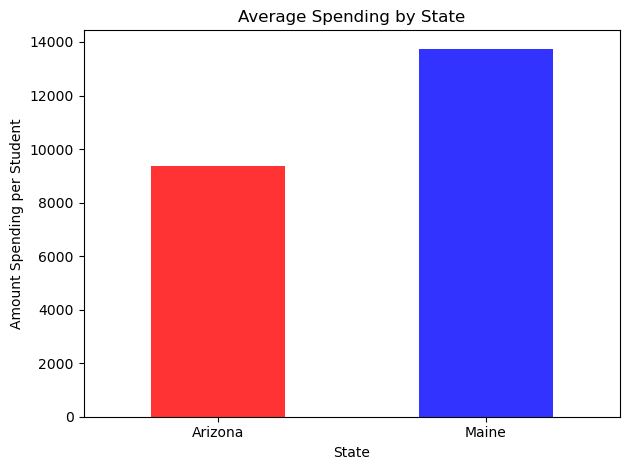

In [1474]:
# Bar chart for average spending per student
spending_per_student = df.groupby('State')['Actual_Spending'].mean()
spending_per_student.plot(kind='bar', color=['red', 'blue'], alpha=0.8)
plt.title('Average Spending by State')
plt.xlabel('State')
plt.ylabel('Amount Spending per Student')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

**Observation:** Maine spends more per student than Arizona, with an average spending of approximately `$14,000` per student in Maine versus `$9,000` per student in Arizona.

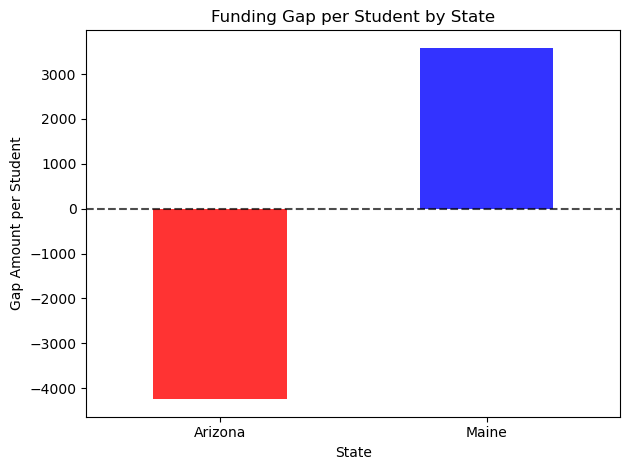

In [1477]:
# Funding Gap per student by state
funding_gap = df.groupby('State')['Funding_Gap'].mean()
funding_gap.plot(kind='bar', color=['red', 'blue'], alpha=0.8)
plt.axhline(0, color='black', linestyle='--', alpha=0.7)   # Add a zero line
plt.title('Funding Gap per Student by State')
plt.xlabel('State')
plt.ylabel('Gap Amount per Student')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

**Observation:** Maine exhibits a surplus in amount spent per student, on average spends approximately `$3,000` more per student than the required spending. While Arizona struggles with a deficit, spends approximately `$4,000` less per student than the required spending.

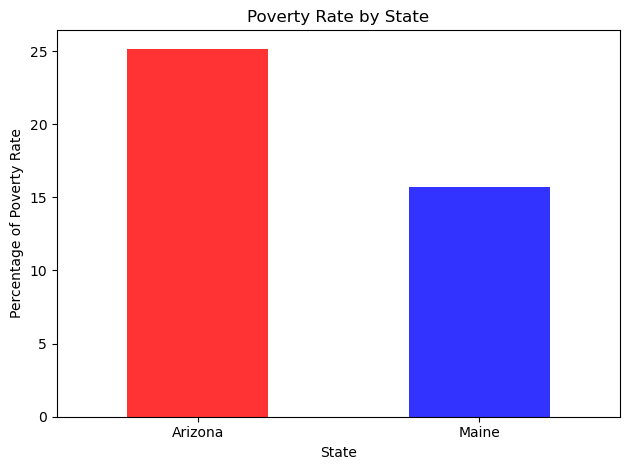

In [1480]:
# Poverty Rate for Each State in Percentage Terms.
poverty_rate = df.groupby('State')['Poverty_Rate'].mean() * 100
poverty_rate.plot(kind='bar', color=['red', 'blue'], alpha=0.8)
plt.title('Poverty Rate by State')
plt.xlabel('State')
plt.ylabel('Percentage of Poverty Rate')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

**Observation:** Arizona has a significantly higher poverty rate (~25%) compared to Maine ( ~15%).

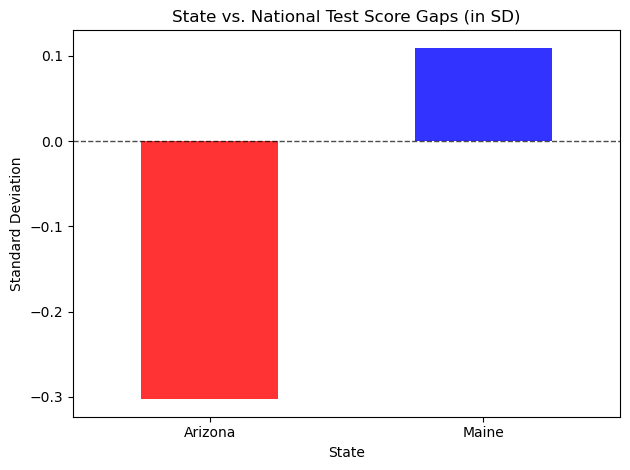

In [1483]:
# This bar chart visualizes the test score gaps relative to the national 
# average in terms of standard deviations.

outcome_gap = df.groupby('State')['Outcome_Gap'].mean()
outcome_gap.plot(kind='bar', color=['red', 'blue'], alpha=0.8)
plt.axhline(0, color='black', linewidth=1, linestyle='--', alpha=0.7)
plt.title('State vs. National Test Score Gaps (in SD)')
plt.xlabel('State')
plt.ylabel('Standard Deviation')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

**Observation:** The outcome gap highlights the disparity in academic performance, with Maine outperforming Arizona. This aligns with the funding disparities observed between the two states.
- Arizona shows a negative outcome gap ~(-0.25 SD), indicating below-average test scores.
- Maine displays a positive outcome gap ~(+0.1 SD), reflecting above-average test scores.

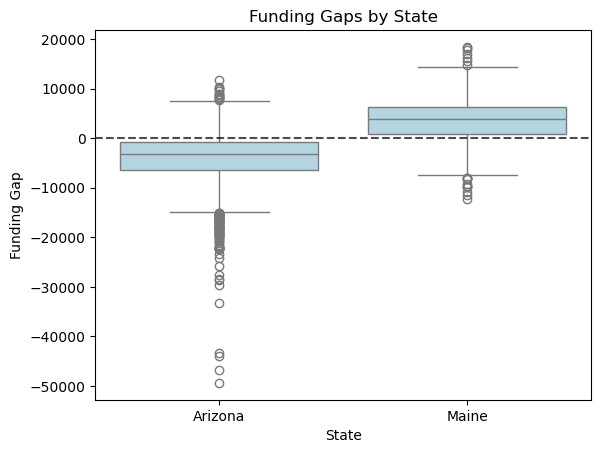

In [1486]:
# Boxplot for Funding Gap
sns.boxplot(data=df, x='State', y='Funding_Gap', color='lightblue')
plt.title('Funding Gaps by State')
plt.xlabel('State')
plt.ylabel('Funding Gap')
plt.axhline(0, color='black', linestyle='--', alpha=0.7)
plt.show()

**Observation:** Arizona shows wider variability (spread) and extreme underfunding in some districts.

# **5. Correlation Analysis**
### Title: Linking Metrics for Deeper Insights

Key Points:
- Scatterplot to analyze the relationship between funding gaps and outcome gaps.
- Scatterplot to analyze poverty rates vs spending per student.

Code:

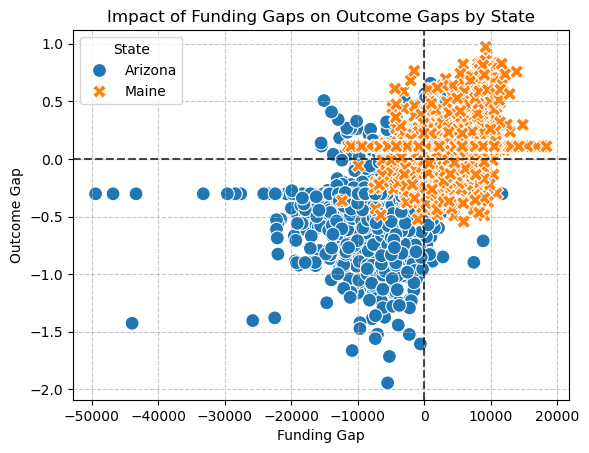

In [1490]:
# Scatterplot for Funding Gap vs Outcome Gap
sns.scatterplot(
    data=df, x='Funding_Gap', y='Outcome_Gap', hue='State', 
    style='State', s=100
)
plt.title('Impact of Funding Gaps on Outcome Gaps by State')
plt.xlabel('Funding Gap')
plt.ylabel('Outcome Gap')
plt.axhline(y=0, color='black', linestyle='--', alpha=0.7)
plt.axvline(x=0, color='black', linestyle='--', alpha=0.7)
plt.legend(title='State')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

**Observation:** The scatterplot shows that Maine generally has positive funding gaps (overfunding) and better outcome gaps, while Arizona has negative funding gaps (underfunding) that correlate with poorer academic performance (negative outcome gaps).

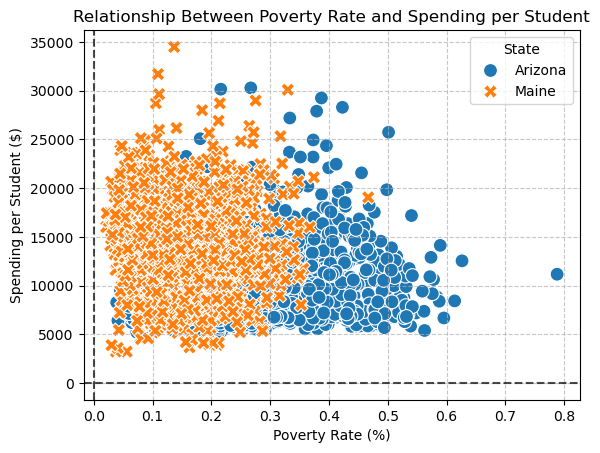

In [1493]:
# Scatterplot for Poverty Rate vs Spending
sns.scatterplot(
    data=df, x='Poverty_Rate', y='Actual_Spending', hue='State', 
    style='State', s=100
)
plt.title('Relationship Between Poverty Rate and Spending per Student')
plt.xlabel('Poverty Rate (%)')
plt.ylabel('Spending per Student ($)')
plt.axhline(y=0, color='black', linestyle='--', alpha=0.7)
plt.axvline(x=0, color='black', linestyle='--', alpha=0.7)
plt.legend(title='State')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

**Observation:** The scatterplot shows a clear distinction between Arizona and Maine:
- Arizona: Higher poverty rates (ranging up to 70%) with relatively lower spending per student.
- Maine: Lower poverty rates (mostly below 30%) with higher spending per student. 

# **6. Key Observations**

### Title: Key Insights from Analysis

Summarize key takeaways:
- Arizona faces significant underfunding across districts, compounded by higher poverty rates.
- Maine demonstrates surplus funding and lower poverty rates, leading to better educational support.

# **7. Conclusions and Recommendations**

### Title: Final Thoughts and Policy Suggestions

Conclusions:
- Maine offers better-funded schools with fewer disparities.
- Arizona’s funding gaps and high poverty rates hinder equitable education opportunities.

Recommendations:
- Arizona: Increase educational funding, prioritize high-poverty districts, and explore equitable resource allocation.
- Maine: Maintain surplus funding and consider using excess for further enhancements or redistribution.